In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#we actually need to concatenate a bunch of files to get who annotated what  
stem = "/home/blitt/projects/podcasts/annotation/hostGuestAnnotation/annotation_output/"
folderNames  = ["5a4d8a8f0b817800013032ea", "5ece9e3b3a19db0cf5af6692", "6022ad31accb29025f079d1c", "65537e115e58fe12b3fcf2f2", "6615cd319d6d5ee3879758ee", "5e318768c7b20d000d0830ce", "5ff66092dfb1e6211decef3e", "6440d887ac943c907678ec9f", "65e739f565a8c818b009f83b"]
dfList = []

for fName in folderNames: 
    fPath = stem + fName + "/annotated_instances.jsonl" 
    currDf = pd.read_json(fPath, orient="records", lines=True)
    currDf["annotatorId"] = fName
    dfList.append(currDf)
df = pd.concat(dfList)

In [4]:
dictList = list(df["label_annotations"])
labels = [int(list(item["sentiment"].values())[0]) for item in dictList]
df["annotation"] = labels

In [5]:
df.head() 

,id,displayed_text,label_annotations,span_annotations,behavioral_data,annotatorId,annotation
0,https://feeds.soundcloud.com/stream/825188326-...,<span style='background-color:#00FF00'>Target ...,{'sentiment': {'neither': '3'}},{},{'time_string': 'Time spent: 0d 0h 0m 12s '},5a4d8a8f0b817800013032ea,3
1,https://www.buzzsprout.com/998860/3752489-corn...,<span style='background-color:#00FF00'>Target ...,{'sentiment': {'host': '1'}},{},{'time_string': 'Time spent: 0d 0h 0m 18s '},5a4d8a8f0b817800013032ea,1
2,https://anchor.fm/s/11028184/podcast/play/1421...,<span style='background-color:#00FF00'>Target ...,{'sentiment': {'guest': '2'}},{},{'time_string': 'Time spent: 0d 0h 0m 17s '},5a4d8a8f0b817800013032ea,2
3,https://api.spreaker.com/download/episode/2686...,<span style='background-color:#00FF00'>Target ...,{'sentiment': {'neither': '3'}},{},{'time_string': 'Time spent: 0d 0h 0m 16s '},5a4d8a8f0b817800013032ea,3
4,https://feeds.soundcloud.com/stream/829978630-...,<span style='background-color:#00FF00'>Target ...,{'sentiment': {'guest': '2'}},{},{'time_string': 'Time spent: 0d 0h 0m 12s '},5a4d8a8f0b817800013032ea,2


In [6]:
np.arange(0, 4, 1)

array([0, 1, 2, 3])

In [7]:
df["dummy"] = 1

In [10]:
len(chunks)

NameError: name 'chunks' is not defined

In [11]:
instGrouped = df[["id", "annotatorId", "annotation"]].groupby("id").agg(list)
instGrouped["annotStr"] = instGrouped["annotatorId"].apply(lambda x: "".join(x))
instGrouped = instGrouped.explode(["annotation", "annotatorId"])

5ece9e3b3a19db0cf5af6692
6615cd319d6d5ee3879758ee
5ff66092dfb1e6211decef3e
5a4d8a8f0b817800013032ea
6440d887ac943c907678ec9f
65e739f565a8c818b009f83b
6022ad31accb29025f079d1c
65537e115e58fe12b3fcf2f2
5e318768c7b20d000d0830ce


Text(0.5, 0.98, 'Comparing Annotation Distribution within Batches of Instances')

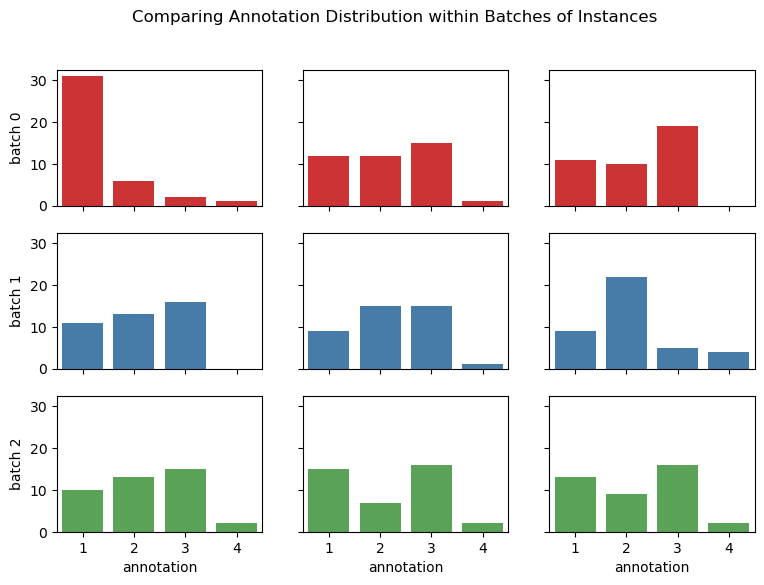

In [12]:

palette = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00']
fig, axs = plt.subplots(3, 3, figsize = (9,6), sharex=True, sharey=True)

#i tells us which batch of annotations 
for i, annotStr in enumerate(instGrouped["annotStr"].unique()): 
    currDf = instGrouped[instGrouped["annotStr"] == annotStr]

    #j tells us which of the three annotators 
    for j, annotatorId in enumerate(currDf["annotatorId"].unique()):
        print(annotatorId) 
        annotDf = currDf[currDf["annotatorId"] == annotatorId]
        sns.countplot(annotDf, x="annotation", ax=axs[i, j], color=palette[i]) 
        
    axs[i, 0].set_ylabel(f"batch {i}")
fig.suptitle("Comparing Annotation Distribution within Batches of Instances")

In [79]:
instGrouped

,annotatorId,annotation,annotStr
id,,,
http://dts.podtrac.com/redirect.mp3/feeds.soundcloud.com/stream/834697933-siggraph-spotlight-35-real-time-ray-tracing-and-realism.mp3,5ece9e3b3a19db0cf5af6692,1,5ece9e3b3a19db0cf5af66926615cd319d6d5ee3879758...
http://dts.podtrac.com/redirect.mp3/feeds.soundcloud.com/stream/834697933-siggraph-spotlight-35-real-time-ray-tracing-and-realism.mp3,6615cd319d6d5ee3879758ee,1,5ece9e3b3a19db0cf5af66926615cd319d6d5ee3879758...
http://dts.podtrac.com/redirect.mp3/feeds.soundcloud.com/stream/834697933-siggraph-spotlight-35-real-time-ray-tracing-and-realism.mp3,5ff66092dfb1e6211decef3e,1,5ece9e3b3a19db0cf5af66926615cd319d6d5ee3879758...
http://media.blubrry.com/champion_magazine_podcast/http://feeds.soundcloud.com/stream/830604499-user-350863618-student-athletes-on-returning-to-campus.mp3,5ece9e3b3a19db0cf5af6692,1,5ece9e3b3a19db0cf5af66926615cd319d6d5ee3879758...
http://media.blubrry.com/champion_magazine_podcast/http://feeds.soundcloud.com/stream/830604499-user-350863618-student-athletes-on-returning-to-campus.mp3,6615cd319d6d5ee3879758ee,2,5ece9e3b3a19db0cf5af66926615cd319d6d5ee3879758...
...,...,...,...
https://www.podtrac.com/pts/redirect.mp3/chrt.fm/track/GF1E57/traffic.megaphone.fm/TAMC8212833222.mp3,6440d887ac943c907678ec9f,3,5a4d8a8f0b817800013032ea6440d887ac943c907678ec...
https://www.podtrac.com/pts/redirect.mp3/chrt.fm/track/GF1E57/traffic.megaphone.fm/TAMC8212833222.mp3,65e739f565a8c818b009f83b,1,5a4d8a8f0b817800013032ea6440d887ac943c907678ec...
https://www.podtrac.com/pts/redirect.mp3/nbaa.org/wp-content/uploads/news/flight-plan/nbaa-flight-plan-20200525.mp3,5a4d8a8f0b817800013032ea,2,5a4d8a8f0b817800013032ea6440d887ac943c907678ec...


In [87]:
instGrouped = instGrouped.reset_index().groupby("id").agg(list)

In [91]:
currId = "5ece9e3b3a19db0cf5af6692" 
currDf = instGrouped[instGrouped["annotatorId"].apply(lambda x: currId in x)]
currDf.shape

(40, 3)

In [81]:
#count up disagreements per annotator 
for annotatorId in instGrouped["annotatorId"].unique(): 
    currDf = instGrouped[instGrouped["annotatorId"] == annotatorId].reset_index("id")
    

In [145]:
from collections import Counter
def getNonModal(inRow): 
    counts = Counter(inRow["annotation"])
    modalVal, modeCount = counts.most_common(1)[0]

    return [modalVal, modeCount]

def getNonModalAnnotator(inRow): 
    annots = inRow["annotation"]
    annotators = inRow["annotatorId"]
    mode = inRow["mode"]

    for i, annot in enumerate(annots): 
        if annot != mode: 
            return annotators[i]


def getNonModalAnnotation(inRow): 
    counts = Counter(inRow["annotation"])
    nonMode, nonModeCount = counts.most_common(2)[1]

    return nonMode

instGrouped = df[["id","annotatorId", "annotation"]].groupby("id").agg(list)
instGrouped[["mode", "modeCount"]] = instGrouped.apply(getNonModal, axis=1).tolist()

In [146]:
twoAgree = instGrouped[instGrouped["modeCount"] == 2]
twoAgree["nonModalAnnotator"] = twoAgree.apply(getNonModalAnnotator, axis=1)

/tmp/ipykernel_1978952/2850186530.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twoAgree["nonModalAnnotator"] = twoAgree.apply(getNonModalAnnotator, axis=1)


In [147]:
#get confusion matrix
twoAgree["nonMode"] = twoAgree.apply(getNonModalAnnotation, axis=1)

/tmp/ipykernel_1978952/2219535619.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twoAgree["nonMode"] = twoAgree.apply(getNonModalAnnotation, axis=1)


In [144]:
Counter([1, 2, 2]).most_common(2)

[(2, 2), (1, 1)]

In [149]:
from sklearn.metrics import confusion_matrix

In [150]:
#first arg. is true val., then pred. 
confusion_matrix(twoAgree["mode"], twoAgree["nonMode"])

#rows is true, column is pred. 

array([[ 0,  3,  3,  3],
       [13,  0,  3,  2],
       [ 9, 11,  0,  4],
       [ 0,  0,  1,  0]])

In [131]:
twoAgree["dummy"] = 1
#sns.countplot(twoAgree, x="nonModalAnnotator")
twoAgree = twoAgree[["nonModalAnnotator", "dummy"]].groupby("nonModalAnnotator").agg(sum).reset_index("nonModalAnnotator").sort_values("dummy", ascending=False) 

/tmp/ipykernel_1978952/1004636058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twoAgree["dummy"] = 1
/tmp/ipykernel_1978952/1004636058.py:3: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  twoAgree = twoAgree[["nonModalAnnotator", "dummy"]].groupby("nonModalAnnotator").agg(sum).reset_index("nonModalAnnotator").sort_values("dummy", ascending=False)


Text(0.5, 0, 'count')

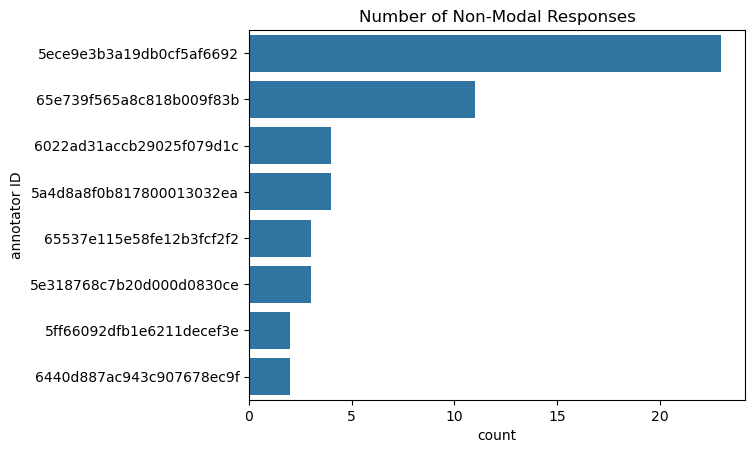

In [132]:
sns.barplot(data=twoAgree, x="dummy", y="nonModalAnnotator")
plt.title("Number of Non-Modal Responses")
plt.ylabel("annotator ID")
plt.xlabel("count")